In [3]:
# standard imports:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()
import keras
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
#import MNIST dataset, including 60,000 training images and 10,000 testing images
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

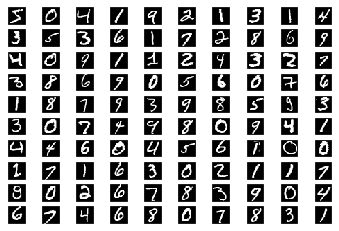

In [12]:
# show the images in the train dataset
from skimage.io import imshow
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.imshow(x_train[i],'gray')
    plt.xticks([]),plt.yticks([])

plt.show()

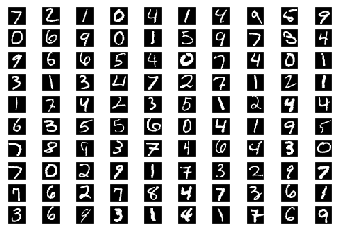

In [13]:
# show the images in the test dataset
from skimage.io import imshow
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.imshow(x_test[i],'gray')
    plt.xticks([]),plt.yticks([])

plt.show()

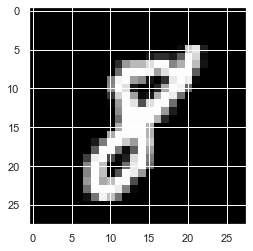

In [27]:
plt.imshow(x_train[17],'gray')

8


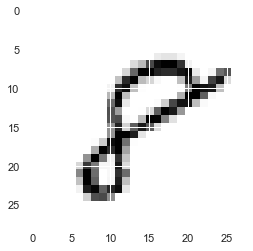

In [28]:
import matplotlib.pyplot as plt
image_index = 59999
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

In [13]:
# tranform the data into two dimensional
x_train_2d = x_train.reshape(x_train.shape[0], 784)
x_test_2d = x_test.reshape(x_test.shape[0],784)

takes time:  1.397273063659668
accuracy:  0.5558
              precision    recall  f1-score   support

           0       0.89      0.79      0.84      1101
           1       0.95      0.85      0.90      1276
           2       0.26      0.90      0.40       294
           3       0.35      0.71      0.47       498
           4       0.17      0.88      0.29       190
           5       0.05      0.55      0.09        80
           6       0.93      0.65      0.77      1377
           7       0.27      0.88      0.42       319
           8       0.67      0.28      0.40      2280
           9       0.95      0.37      0.53      2585

    accuracy                           0.56     10000
   macro avg       0.55      0.69      0.51     10000
weighted avg       0.78      0.56      0.59     10000



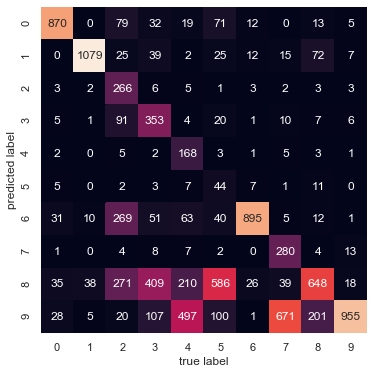

In [35]:
#Gaussian naive bayes
from sklearn.naive_bayes import GaussianNB
import time
start = time.time()
model = GaussianNB()
model.fit(x_train_2d, y_train);
yfit = model.predict(x_test_2d)
end = time.time()
print("takes time: ", end-start)

#accuracy score
from sklearn.metrics import accuracy_score
print("accuracy: ", accuracy_score(y_test, yfit))

#confusion matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, yfit)
plt.subplots(figsize=(6,6))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

#metrics for each classification
from sklearn import metrics
print(metrics.classification_report(yfit, y_test))

takes time:  0.4413931369781494
accuracy:  0.8365
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       986
           1       0.93      0.91      0.92      1163
           2       0.83      0.90      0.86       955
           3       0.84      0.80      0.82      1067
           4       0.75      0.84      0.79       868
           5       0.66      0.86      0.75       686
           6       0.90      0.89      0.89       971
           7       0.84      0.94      0.88       920
           8       0.80      0.66      0.72      1171
           9       0.86      0.71      0.78      1213

    accuracy                           0.84     10000
   macro avg       0.83      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



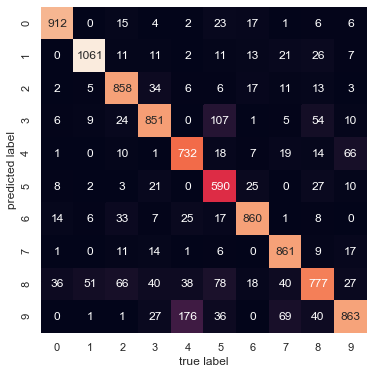

In [38]:
#multinomial naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB
import time
start = time.time()
model = MultinomialNB()
model.fit(x_train_2d, y_train);
yfit = model.predict(x_test_2d)
end = time.time()
print("takes time: ", end-start)

#accuracy score
from sklearn.metrics import accuracy_score
print("accuracy: ", accuracy_score(y_test, yfit))

#confusion matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, yfit)
plt.subplots(figsize=(6,6))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

#metrics for each classification
from sklearn import metrics
print(metrics.classification_report(yfit, y_test))

takes time:  26.043453216552734
accuracy:  0.8785
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       998
           1       0.96      0.95      0.96      1145
           2       0.86      0.87      0.86      1019
           3       0.86      0.82      0.84      1060
           4       0.88      0.86      0.87      1004
           5       0.84      0.85      0.85       875
           6       0.88      0.89      0.89       946
           7       0.90      0.93      0.91       996
           8       0.82      0.84      0.83       949
           9       0.84      0.85      0.84      1008

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



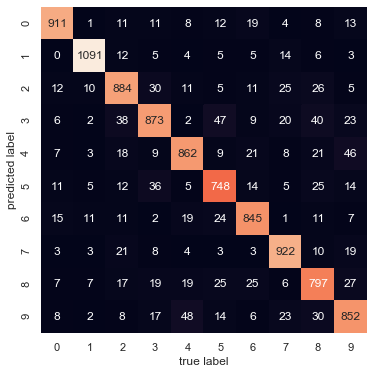

In [42]:
#DecisionTreeClassifier estimator
from sklearn.tree import DecisionTreeClassifier
import time
start = time.time()
model = DecisionTreeClassifier().fit(x_train_2d, y_train)
yfit = model.predict(x_test_2d)
end = time.time()
print("takes time: ", end-start)

#accuracy score
from sklearn.metrics import accuracy_score
print("accuracy: ", accuracy_score(y_test, yfit))

#confusion matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, yfit)
plt.subplots(figsize=(6,6))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

#metrics for each classification
from sklearn import metrics
print(metrics.classification_report(yfit, y_test))

takes time:  526.8434062004089
accuracy:  0.9715
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       994
           1       0.99      0.99      0.99      1132
           2       0.97      0.96      0.97      1039
           3       0.97      0.96      0.97      1013
           4       0.98      0.98      0.98       982
           5       0.96      0.98      0.97       882
           6       0.98      0.97      0.98       965
           7       0.97      0.97      0.97      1022
           8       0.96      0.96      0.96       966
           9       0.95      0.96      0.96      1005

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



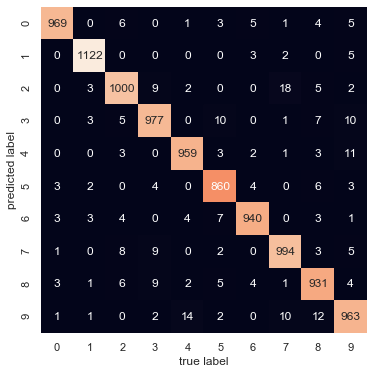

In [40]:
# random forest
from sklearn.ensemble import RandomForestClassifier
import time
start = time.time()
model = RandomForestClassifier(n_estimators=1000)
model.fit(x_train_2d, y_train)
yfit = model.predict(x_test_2d)
end = time.time()
print("takes time: ", end-start)

#accuracy score
from sklearn.metrics import accuracy_score
print("accuracy: ", accuracy_score(y_test, yfit))

#confusion matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, yfit)
plt.subplots(figsize=(6,6))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

#metrics for each classification
from sklearn import metrics
print(metrics.classification_report(yfit, y_test))

takes time:  54.459675788879395
accuracy:  0.9696
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       996
           1       0.99      0.99      0.99      1132
           2       0.97      0.96      0.96      1043
           3       0.96      0.96      0.96      1012
           4       0.98      0.98      0.98       982
           5       0.96      0.97      0.97       884
           6       0.98      0.98      0.98       958
           7       0.96      0.97      0.97      1021
           8       0.96      0.96      0.96       974
           9       0.95      0.96      0.95       998

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



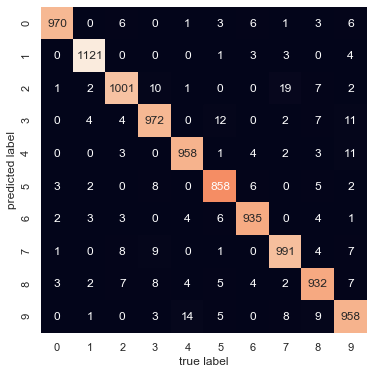

In [14]:
# random forest
from sklearn.ensemble import RandomForestClassifier
import time
start = time.time()
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train_2d, y_train)
yfit = model.predict(x_test_2d)
end = time.time()
print("takes time: ", end-start)

#accuracy score
from sklearn.metrics import accuracy_score
print("accuracy: ", accuracy_score(y_test, yfit))

#confusion matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, yfit)
plt.subplots(figsize=(6,6))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

#metrics for each classification
from sklearn import metrics
print(metrics.classification_report(yfit, y_test))

In [ ]:
# random forest
from sklearn.ensemble import RandomForestClassifier
import time
start = time.time()
model = RandomForestClassifier(n_estimators=10000)
model.fit(x_train_2d, y_train)
yfit = model.predict(x_test_2d)
end = time.time()
print("takes time: ", end-start)

#accuracy score
from sklearn.metrics import accuracy_score
print("accuracy: ", accuracy_score(y_test, yfit))

#confusion matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, yfit)
plt.subplots(figsize=(6,6))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

#metrics for each classification
from sklearn import metrics
print(metrics.classification_report(yfit, y_test))

takes time:  777.3844690322876
accuracy:  0.9688
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      1011
           1       1.00      0.95      0.98      1187
           2       0.96      0.98      0.97      1009
           3       0.97      0.96      0.97      1012
           4       0.96      0.98      0.97       967
           5       0.97      0.97      0.97       893
           6       0.99      0.98      0.98       963
           7       0.96      0.96      0.96      1028
           8       0.94      0.99      0.96       924
           9       0.95      0.96      0.95      1006

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



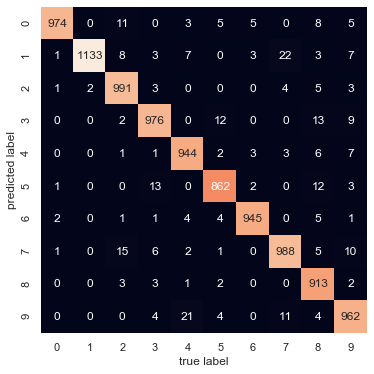

In [41]:
# knn
from sklearn.neighbors import KNeighborsClassifier
import time
start = time.time()
model = KNeighborsClassifier(n_neighbors=5)  
model.fit(x_train_2d, y_train)
yfit = model.predict(x_test_2d)
end = time.time()
print("takes time: ", end-start)

#accuracy score
from sklearn.metrics import accuracy_score
print("accuracy: ", accuracy_score(y_test, yfit))

#confusion matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, yfit)
plt.subplots(figsize=(6,6))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

#metrics for each classification
from sklearn import metrics
print(metrics.classification_report(yfit, y_test))

takes time:  16.633262157440186
accuracy:  0.9228
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1005
           1       0.98      0.97      0.98      1151
           2       0.89      0.94      0.91       976
           3       0.91      0.90      0.90      1021
           4       0.93      0.92      0.93       996
           5       0.85      0.90      0.88       839
           6       0.95      0.94      0.95       976
           7       0.92      0.92      0.92      1025
           8       0.90      0.87      0.88      1008
           9       0.90      0.90      0.90      1003

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



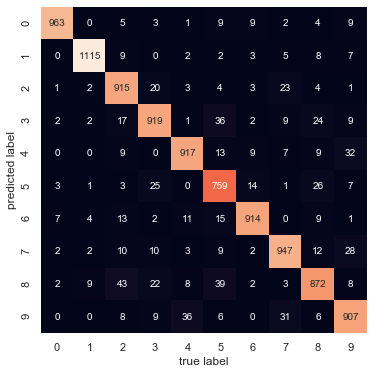

In [24]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
import time
start = time.time()
model = LogisticRegression(C=50. / 60000, penalty='l1', solver='saga', tol=0.1, multi_class='auto')
model.fit(x_train_2d, y_train)
yfit = model.predict(x_test_2d)
end = time.time()
print("takes time: ", end-start)

#accuracy score
from sklearn.metrics import accuracy_score
print("accuracy: ", accuracy_score(y_test, yfit))

#confusion matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, yfit)
plt.subplots(figsize=(6,6))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

#metrics for each classification
from sklearn import metrics
print(metrics.classification_report(yfit, y_test))

takes time:  570.7450299263
accuracy:  0.9833
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       989
           1       0.99      0.99      0.99      1142
           2       0.98      0.98      0.98      1035
           3       0.99      0.98      0.98      1018
           4       0.98      0.98      0.98       984
           5       0.98      0.99      0.98       884
           6       0.99      0.99      0.99       953
           7       0.98      0.98      0.98      1023
           8       0.98      0.98      0.98       969
           9       0.97      0.98      0.97      1003

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



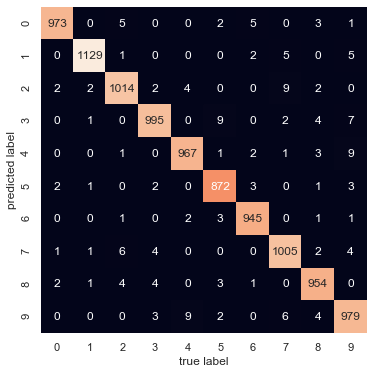

In [43]:
# svm
from sklearn.svm import SVC
import time
start = time.time()
model = SVC(C=1E6, kernel='rbf', degree=4, gamma="scale")
model.fit(x_train_2d, y_train)
#model.support_vectors_
yfit = model.predict(x_test_2d)
end = time.time()
print("takes time: ", end-start)

#accuracy score
from sklearn.metrics import accuracy_score
print("accuracy: ", accuracy_score(y_test, yfit))

#confusion matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, yfit)
plt.subplots(figsize=(6,6))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

#metrics for each classification
from sklearn import metrics
print(metrics.classification_report(yfit, y_test))

takes time:  436.78972005844116
accuracy:  0.9787
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       996
           1       0.99      0.98      0.99      1149
           2       0.97      0.98      0.98      1024
           3       0.98      0.98      0.98      1009
           4       0.98      0.98      0.98       986
           5       0.97      0.98      0.97       889
           6       0.98      0.98      0.98       954
           7       0.97      0.98      0.98      1020
           8       0.98      0.98      0.98       973
           9       0.97      0.98      0.97      1000

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



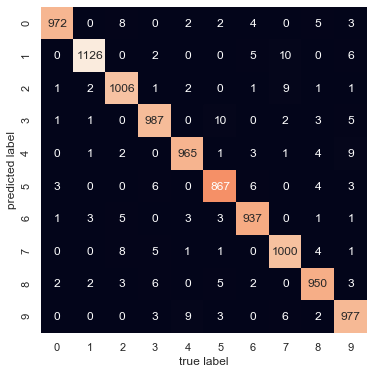

In [45]:
#svm
from sklearn.svm import SVC
import time
start = time.time()
model = SVC(C=1E6, kernel='poly', degree=3, gamma="auto")
model.fit(x_train_2d, y_train)
#model.support_vectors_
yfit = model.predict(x_test_2d)
end = time.time()
print("takes time: ", end-start)

#accuracy score
from sklearn.metrics import accuracy_score
print("accuracy: ", accuracy_score(y_test, yfit))

#confusion matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, yfit)
plt.subplots(figsize=(6,6))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

#metrics for each classification
from sklearn import metrics
print(metrics.classification_report(yfit, y_test))

In [9]:
# take 6000 train data and 1000 test data to test different kernerls in svm
x_train_2d_p = x_train_2d[:6000,:]
y_train_p = y_train[:6000]
x_test_2d_p = x_test_2d[:1000, :]
y_test_p = y_test[:1000]

takes time:  8.605004072189331
accuracy:  0.888
              precision    recall  f1-score   support

           0       0.94      0.90      0.92        89
           1       0.99      0.95      0.97       131
           2       0.84      0.90      0.87       109
           3       0.87      0.89      0.88       104
           4       0.93      0.88      0.90       116
           5       0.86      0.87      0.87        86
           6       0.91      0.91      0.91        87
           7       0.86      0.88      0.87        97
           8       0.83      0.86      0.85        86
           9       0.82      0.81      0.81        95

    accuracy                           0.89      1000
   macro avg       0.89      0.89      0.89      1000
weighted avg       0.89      0.89      0.89      1000



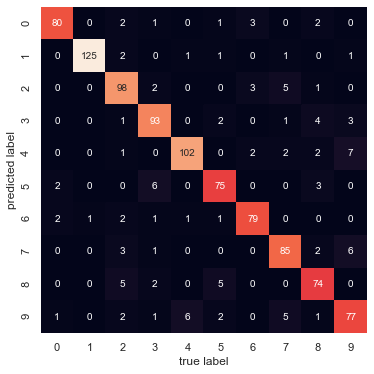

In [21]:
# svm
from sklearn.svm import SVC
import time
start = time.time()
model = SVC(kernel='linear', C=10)
model.fit(x_train_2d_p, y_train_p)
#model.support_vectors_
yfit = model.predict(x_test_2d_p)
end = time.time()
print("takes time: ", end-start)

#accuracy score
from sklearn.metrics import accuracy_score
print("accuracy: ", accuracy_score(y_test_p, yfit))

#confusion matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test_p, yfit)
plt.subplots(figsize=(6,6))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

#metrics for each classification
from sklearn import metrics
print(metrics.classification_report(yfit, y_test_p))

In [11]:
# use gird search to test different parameters and get the best
from sklearn.model_selection import GridSearchCV
Cs = [0.1,1,10,1E6]
param_grid = {'C': Cs}
grid_search = GridSearchCV(SVC(kernel='linear'), param_grid)
grid_search.fit(x_train_2d_p, y_train_p)
grid_search.best_params_

/Users/martin/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'C': 0.1}

takes time:  10.682786703109741
accuracy:  0.888
              precision    recall  f1-score   support

           0       0.94      0.90      0.92        89
           1       0.99      0.95      0.97       131
           2       0.84      0.90      0.87       109
           3       0.87      0.89      0.88       104
           4       0.93      0.88      0.90       116
           5       0.86      0.87      0.87        86
           6       0.91      0.91      0.91        87
           7       0.86      0.88      0.87        97
           8       0.83      0.86      0.85        86
           9       0.82      0.81      0.81        95

    accuracy                           0.89      1000
   macro avg       0.89      0.89      0.89      1000
weighted avg       0.89      0.89      0.89      1000



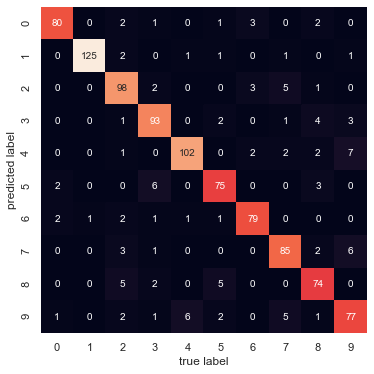

In [14]:
#svm
from sklearn.svm import SVC
import time
start = time.time()
model = SVC(kernel='linear', C=0.1)
model.fit(x_train_2d_p, y_train_p)
#model.support_vectors_
yfit = model.predict(x_test_2d_p)
end = time.time()
print("takes time: ", end-start)

#accuracy score
from sklearn.metrics import accuracy_score
print("accuracy: ", accuracy_score(y_test_p, yfit))

#confusion matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test_p, yfit)
plt.subplots(figsize=(6,6))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

#metrics for each classification
from sklearn import metrics
print(metrics.classification_report(yfit, y_test_p))

takes time:  15.68030309677124
accuracy:  0.938
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        89
           1       0.99      0.98      0.99       127
           2       0.91      0.95      0.93       112
           3       0.91      0.93      0.92       104
           4       0.95      0.93      0.94       112
           5       0.93      0.93      0.93        87
           6       0.95      0.95      0.95        87
           7       0.94      0.93      0.93       100
           8       0.90      0.89      0.89        90
           9       0.91      0.93      0.92        92

    accuracy                           0.94      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.94      0.94      0.94      1000



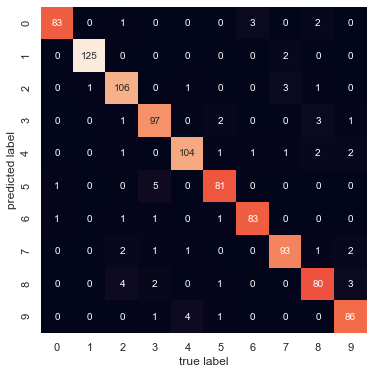

In [7]:
# svm
from sklearn.svm import SVC
import time
start = time.time()
model = SVC(C=1, kernel='rbf', degree=3,gamma="scale")
model.fit(x_train_2d_p, y_train_p)
#model.support_vectors_
yfit = model.predict(x_test_2d_p)
end = time.time()
print("takes time: ", end-start)

#accuracy score
from sklearn.metrics import accuracy_score
print("accuracy: ", accuracy_score(y_test_p, yfit))

#confusion matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test_p, yfit)
plt.subplots(figsize=(6,6))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

#metrics for each classification
from sklearn import metrics
print(metrics.classification_report(yfit, y_test_p))

takes time:  14.984891176223755
accuracy:  0.947
              precision    recall  f1-score   support

           0       0.99      0.94      0.97        89
           1       0.99      0.98      0.99       127
           2       0.94      0.96      0.95       114
           3       0.92      0.95      0.93       103
           4       0.96      0.93      0.95       114
           5       0.95      0.94      0.95        88
           6       0.97      0.94      0.95        89
           7       0.92      0.94      0.93        97
           8       0.90      0.93      0.91        86
           9       0.93      0.94      0.93        93

    accuracy                           0.95      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000



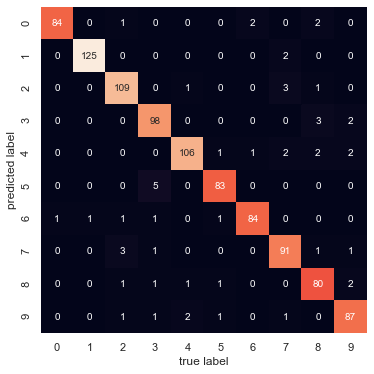

In [8]:
# svm
from sklearn.svm import SVC
import time
start = time.time()
model = model = SVC(C=1E6, kernel='rbf', degree=4, gamma="scale")
model.fit(x_train_2d_p, y_train_p)
#model.support_vectors_
yfit = model.predict(x_test_2d_p)
end = time.time()
print("takes time: ", end-start)

#accuracy score
from sklearn.metrics import accuracy_score
print("accuracy: ", accuracy_score(y_test_p, yfit))

#confusion matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test_p, yfit)
plt.subplots(figsize=(6,6))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

#metrics for each classification
from sklearn import metrics
print(metrics.classification_report(yfit, y_test_p))

takes time:  14.187426090240479
accuracy:  0.947
              precision    recall  f1-score   support

           0       0.99      0.94      0.97        89
           1       0.99      0.98      0.99       127
           2       0.94      0.96      0.95       114
           3       0.92      0.95      0.93       103
           4       0.96      0.93      0.95       114
           5       0.95      0.94      0.95        88
           6       0.97      0.94      0.95        89
           7       0.92      0.94      0.93        97
           8       0.90      0.93      0.91        86
           9       0.93      0.94      0.93        93

    accuracy                           0.95      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000



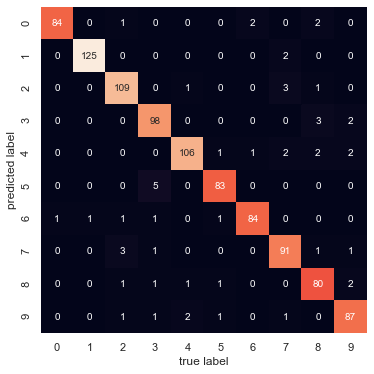

In [12]:
# svm
from sklearn.svm import SVC
import time
start = time.time()
model = model = SVC(C=1E6, kernel='rbf', degree=5, gamma="scale")
model.fit(x_train_2d_p, y_train_p)
#model.support_vectors_
yfit = model.predict(x_test_2d_p)
end = time.time()
print("takes time: ", end-start)

#accuracy score
from sklearn.metrics import accuracy_score
print("accuracy: ", accuracy_score(y_test_p, yfit))

#confusion matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test_p, yfit)
plt.subplots(figsize=(6,6))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

#metrics for each classification
from sklearn import metrics
print(metrics.classification_report(yfit, y_test_p))

takes time:  12.094074964523315
accuracy:  0.927
              precision    recall  f1-score   support

           0       0.96      0.92      0.94        89
           1       0.98      0.93      0.96       133
           2       0.88      0.94      0.91       108
           3       0.86      0.93      0.89        99
           4       0.96      0.91      0.94       116
           5       0.93      0.89      0.91        91
           6       0.95      0.93      0.94        89
           7       0.90      0.93      0.91        96
           8       0.89      0.94      0.91        84
           9       0.95      0.94      0.94        95

    accuracy                           0.93      1000
   macro avg       0.93      0.93      0.93      1000
weighted avg       0.93      0.93      0.93      1000



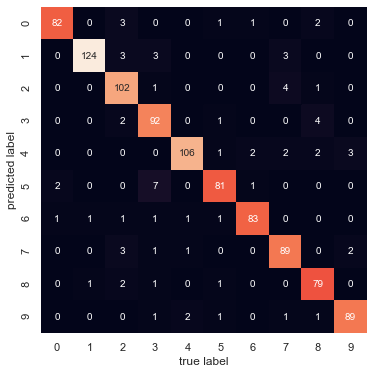

In [9]:
# svm
from sklearn.svm import SVC
import time
start = time.time()
model = SVC(kernel='poly', degree=3, gamma="auto")
model.fit(x_train_2d_p, y_train_p)
#model.support_vectors_
yfit = model.predict(x_test_2d_p)
end = time.time()
print("takes time: ", end-start)

#accuracy score
from sklearn.metrics import accuracy_score
print("accuracy: ", accuracy_score(y_test_p, yfit))

#confusion matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test_p, yfit)
plt.subplots(figsize=(6,6))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

#metrics for each classification
from sklearn import metrics
print(metrics.classification_report(yfit, y_test_p))

takes time:  12.426448106765747
accuracy:  0.911
              precision    recall  f1-score   support

           0       0.96      0.90      0.93        91
           1       0.98      0.83      0.90       150
           2       0.84      0.94      0.89       104
           3       0.86      0.93      0.89        99
           4       0.91      0.93      0.92       107
           5       0.91      0.90      0.90        88
           6       0.93      0.92      0.93        88
           7       0.90      0.93      0.91        96
           8       0.88      0.95      0.91        82
           9       0.94      0.93      0.93        95

    accuracy                           0.91      1000
   macro avg       0.91      0.92      0.91      1000
weighted avg       0.91      0.91      0.91      1000



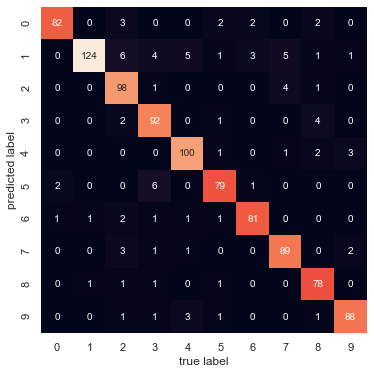

In [22]:
# svm
from sklearn.svm import SVC
import time
start = time.time()
model = SVC(C=1E6, kernel='poly', degree=4, gamma="auto")
model.fit(x_train_2d_p, y_train_p)
#model.support_vectors_
yfit = model.predict(x_test_2d_p)
end = time.time()
print("takes time: ", end-start)

#accuracy score
from sklearn.metrics import accuracy_score
print("accuracy: ", accuracy_score(y_test_p, yfit))

#confusion matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test_p, yfit)
plt.subplots(figsize=(6,6))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

#metrics for each classification
from sklearn import metrics
print(metrics.classification_report(yfit, y_test_p))

takes time:  13.711045026779175
accuracy:  0.872
              precision    recall  f1-score   support

           0       0.92      0.88      0.90        89
           1       0.98      0.69      0.81       180
           2       0.79      0.96      0.87        96
           3       0.81      0.93      0.87        94
           4       0.87      0.91      0.89       105
           5       0.84      0.88      0.86        83
           6       0.91      0.90      0.90        88
           7       0.88      0.92      0.90        95
           8       0.80      0.93      0.86        76
           9       0.90      0.90      0.90        94

    accuracy                           0.87      1000
   macro avg       0.87      0.89      0.88      1000
weighted avg       0.88      0.87      0.87      1000



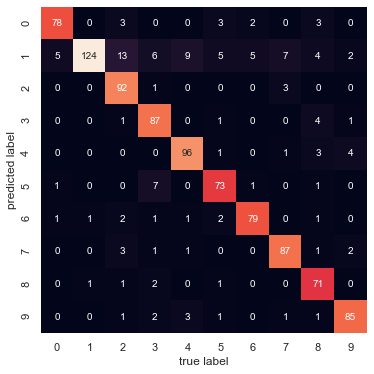

In [23]:
# svm
from sklearn.svm import SVC
import time
start = time.time()
model = SVC(C=1E6, kernel='poly', degree=5, gamma="auto")
model.fit(x_train_2d_p, y_train_p)
#model.support_vectors_
yfit = model.predict(x_test_2d_p)
end = time.time()
print("takes time: ", end-start)

#accuracy score
from sklearn.metrics import accuracy_score
print("accuracy: ", accuracy_score(y_test_p, yfit))

#confusion matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test_p, yfit)
plt.subplots(figsize=(6,6))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

#metrics for each classification
from sklearn import metrics
print(metrics.classification_report(yfit, y_test_p))

In [4]:
# Convolutional Neural Network
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [5]:
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import tensorflow as tf
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [6]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 22s 359us/step - loss: 0.2147 - accuracy: 0.9355
Epoch 2/10
60000/60000 [==============================] - 20s 332us/step - loss: 0.0851 - accuracy: 0.9739
Epoch 3/10
60000/60000 [==============================] - 23s 382us/step - loss: 0.0616 - accuracy: 0.9804
Epoch 4/10
60000/60000 [==============================] - 22s 373us/step - loss: 0.0452 - accuracy: 0.9854
Epoch 5/10
60000/60000 [==============================] - 22s 365us/step - loss: 0.0358 - accuracy: 0.9882
Epoch 6/10
60000/60000 [==============================] - 22s 371us/step - loss: 0.0288 - accuracy: 0.9904
Epoch 7/10
60000/60000 [==============================] - 22s 369us/step - loss: 0.0268 - accuracy: 0.9909
Epoch 8/10
60000/60000 [==============================] - 22s 373us/step - loss: 0.0208 - accuracy: 0.9927
Epoch 9/10
60000/60000 [==============================] - 22s 370us/step - loss: 0.0193 - accuracy: 0.9933
Epoch 10/10
60000/60000 [============

In [7]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 112us/step


[0.055861273117920836, 0.9865999817848206]

image_index = 4444
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, img_rows, img_cols, 1))
print(pred.argmax())

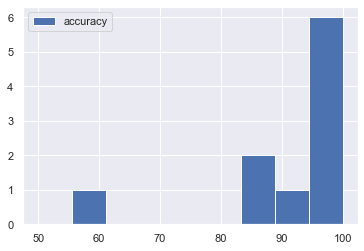

In [65]:
# plot accuracy result
accuracy = [98.66, 98.33, 97.87, 97.18, 96.69, 96.88, 92.28, 87.66, 83.65, 55.58]
bins = np.linspace(50, 100, 10)
hist = plt.hist(accuracy, bins, label=['accuracy'])
plt.legend(loc='upper left')
plt.show()

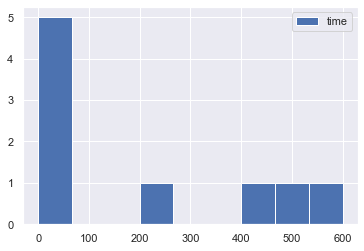

In [66]:
# plot time result
time = [225, 571, 437, 527, 54, 777, 17, 26, 0.44, 1.40]
bins = np.linspace(0, 600, 10)
plt.hist(time, bins, label = ['time'])
plt.legend(loc='upper right')
plt.show()

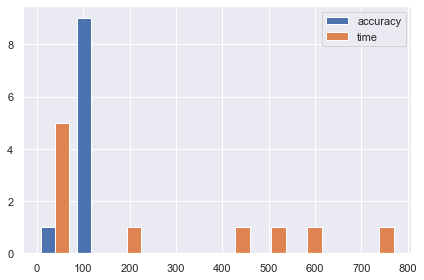

In [67]:
# plot accuracy and time results
plt.hist([accuracy, time], label = ['accuracy','time'])
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()